In [1]:
# This is to access the package without it being installed for testing.
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from pylossmap.fetcher import BLMDataFetcher
from pylossmap.utils import get_ADT
from pylossmap.timber_vars import PRIMARY_BLM_7
import pandas as pd
import matplotlib.pyplot as plt

/home/lcoyle/.config/miniconda3/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


# Fetching BLM data around ADT blowup triggers

In [3]:
fetcher = BLMDataFetcher(pbar=False)

In [4]:
t1 = pd.to_datetime('2018-04-08 22:15:00').tz_localize('Europe/Zurich')
t2 = pd.to_datetime('2018-04-08 22:20:00').tz_localize('Europe/Zurich')

Gets BLM data surrounding ADT blowup triggers in specified time interval, 5s before and 20s after trigger.


B1H: 1 / 6
Beam mode FLATTOP
04-08 22:15:48 ▶04-08 22:16:13
Beam mode FLATTOP
04-08 22:05:53 ▶04-08 22:15:53

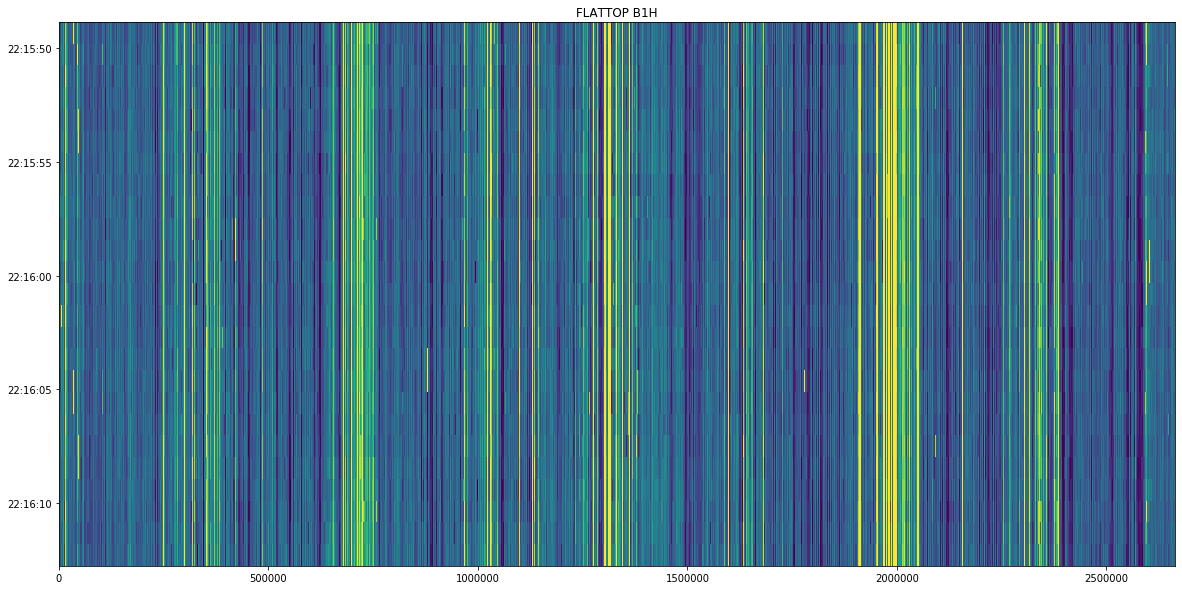

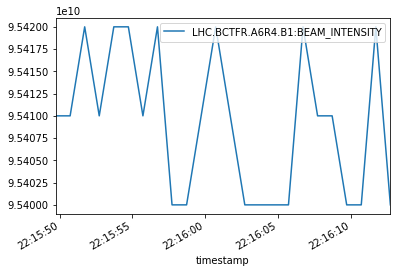

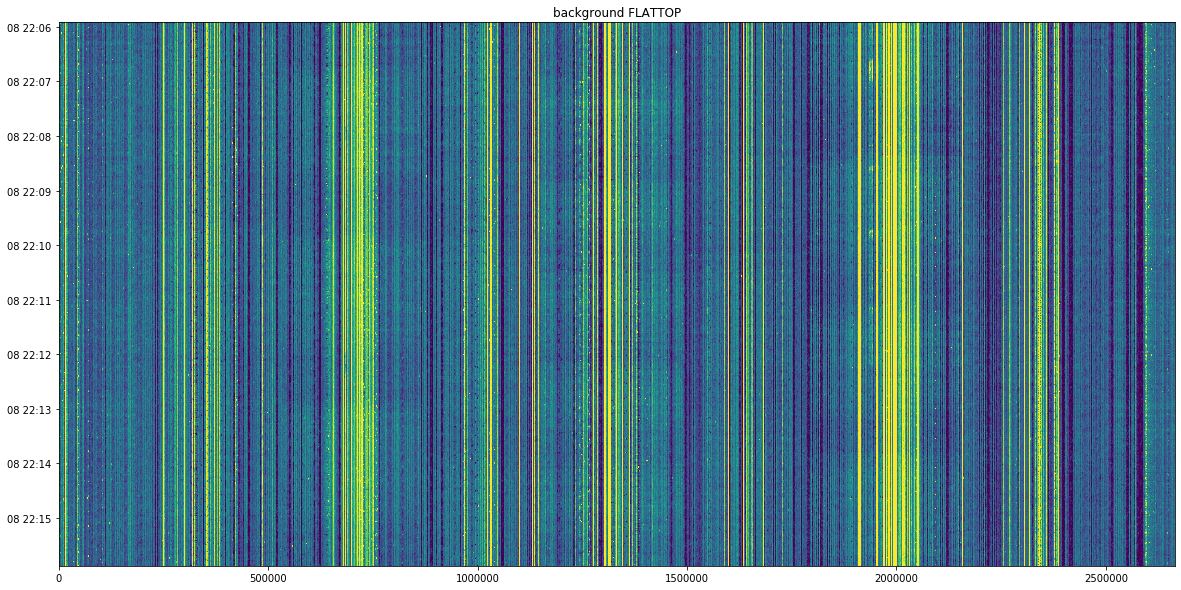

ADT_B1H_amp                                        NaN
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:15:53.749000072+02:00
Name: 2018-04-08 22:15:53.749000072+02:00, dtype: object
---------

B1H: 2 / 6
Beam mode FLATTOP
04-08 22:16:19 ▶04-08 22:16:44
Beam mode FLATTOP
04-08 22:16:02 ▶04-08 22:16:24

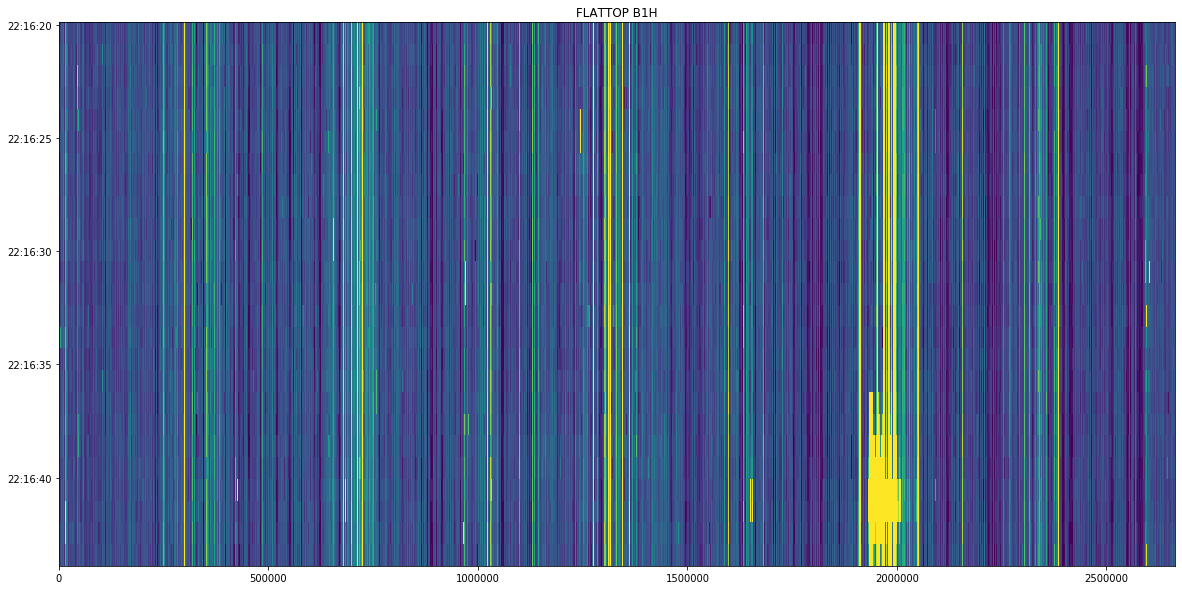

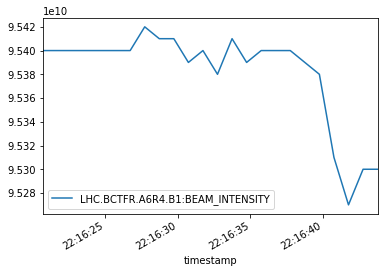

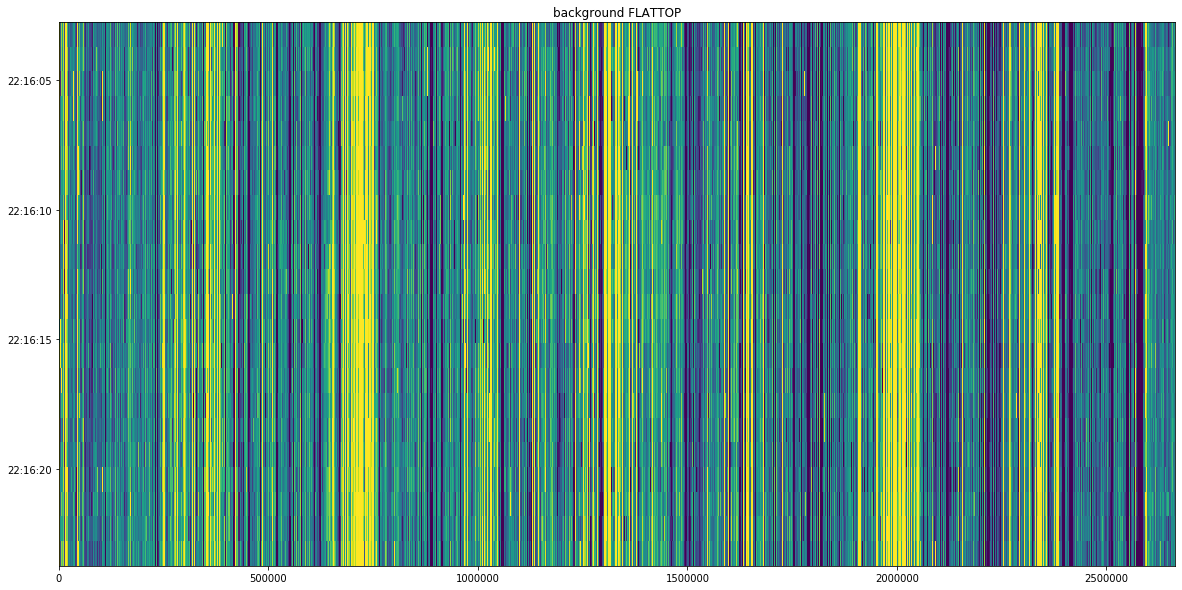

ADT_B1H_amp                                        NaN
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:16:24.750999928+02:00
Name: 2018-04-08 22:16:24.750999928+02:00, dtype: object
---------

B1H: 3 / 6
Beam mode FLATTOP
04-08 22:16:29 ▶04-08 22:16:54
Beam mode FLATTOP
04-08 22:16:02 ▶04-08 22:16:24

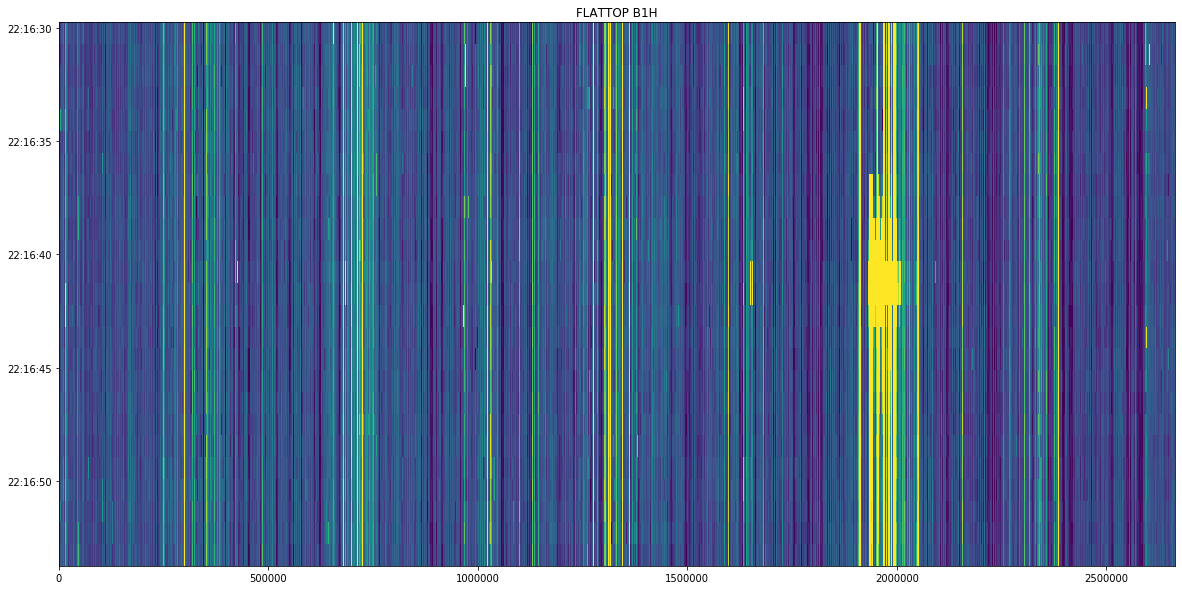

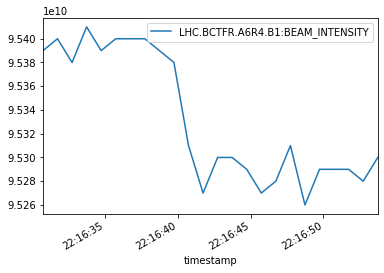

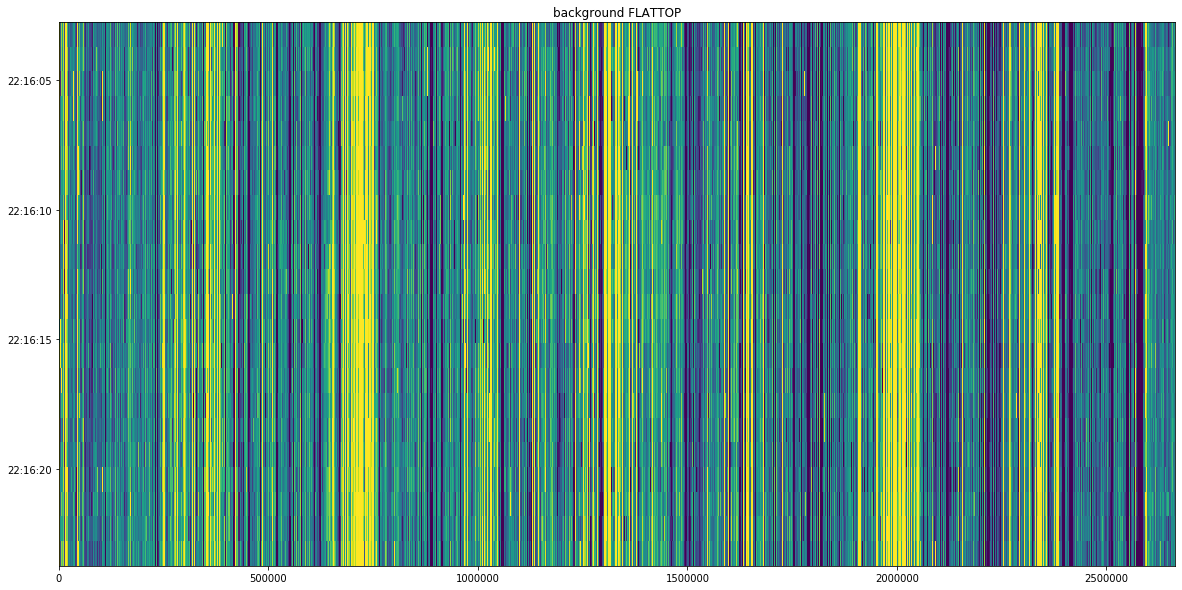

ADT_B1H_amp                                       0.05
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:16:34.752000093+02:00
Name: 2018-04-08 22:16:34.752000093+02:00, dtype: object
---------

B1H: 4 / 6
Beam mode FLATTOP
04-08 22:16:57 ▶04-08 22:17:22
Beam mode FLATTOP
04-08 22:16:02 ▶04-08 22:16:24

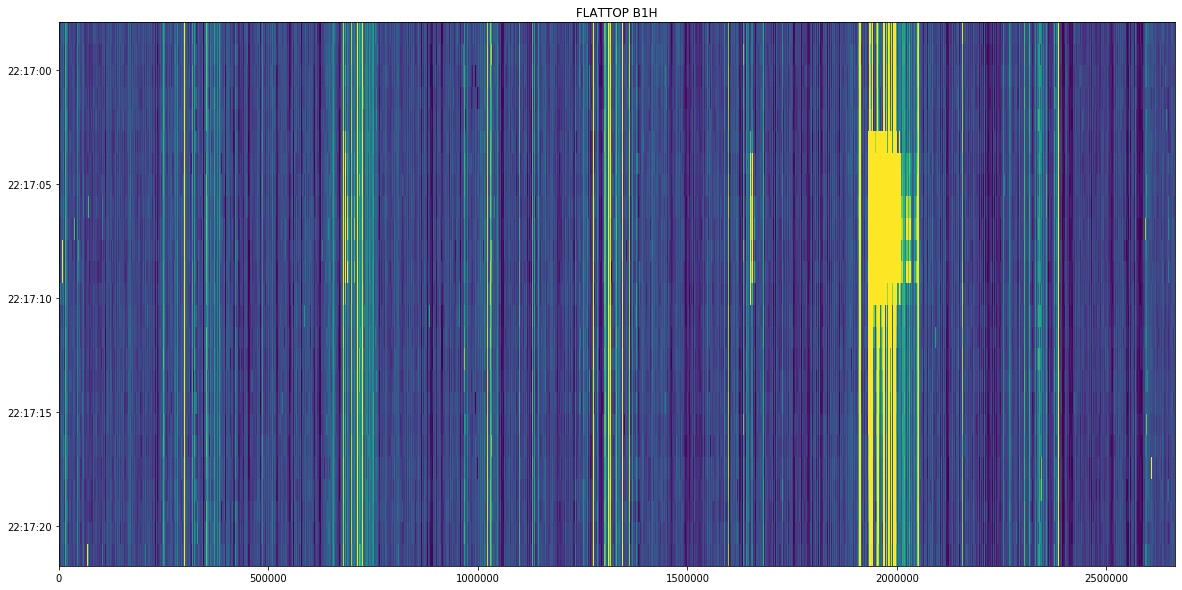

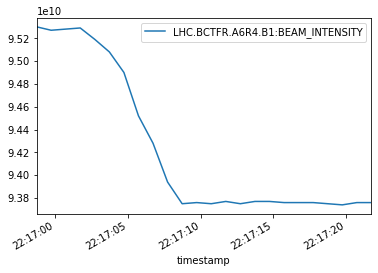

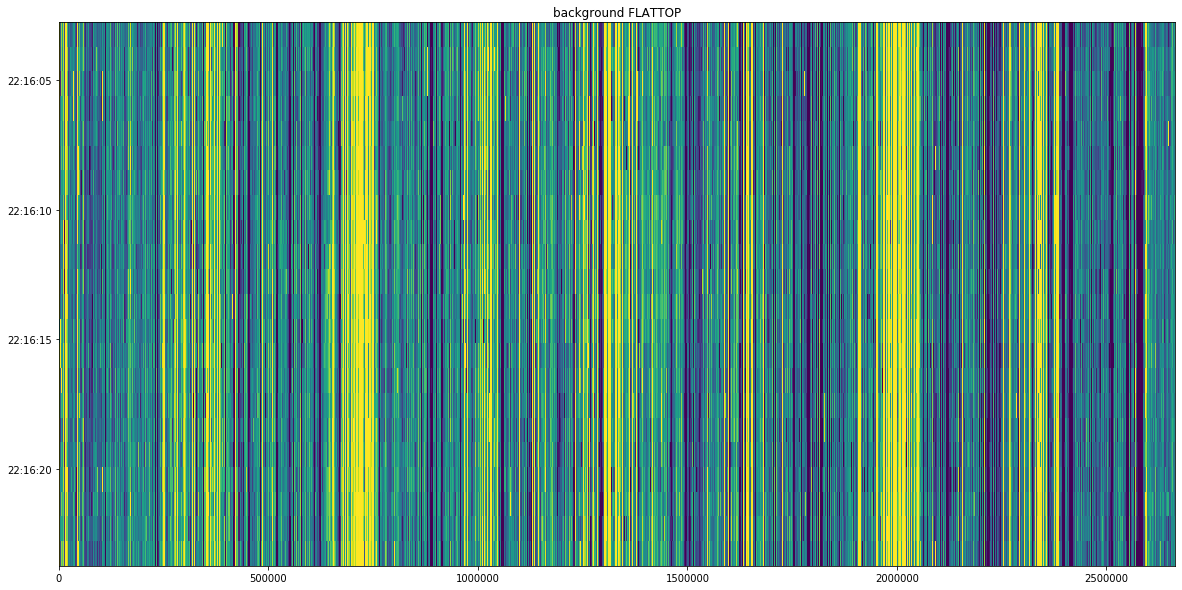

ADT_B1H_amp                                       0.08
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:17:02.753999949+02:00
Name: 2018-04-08 22:17:02.753999949+02:00, dtype: object
---------

B1H: 5 / 6
Beam mode FLATTOP
04-08 22:18:24 ▶04-08 22:18:49
Beam mode FLATTOP
04-08 22:17:11 ▶04-08 22:18:29

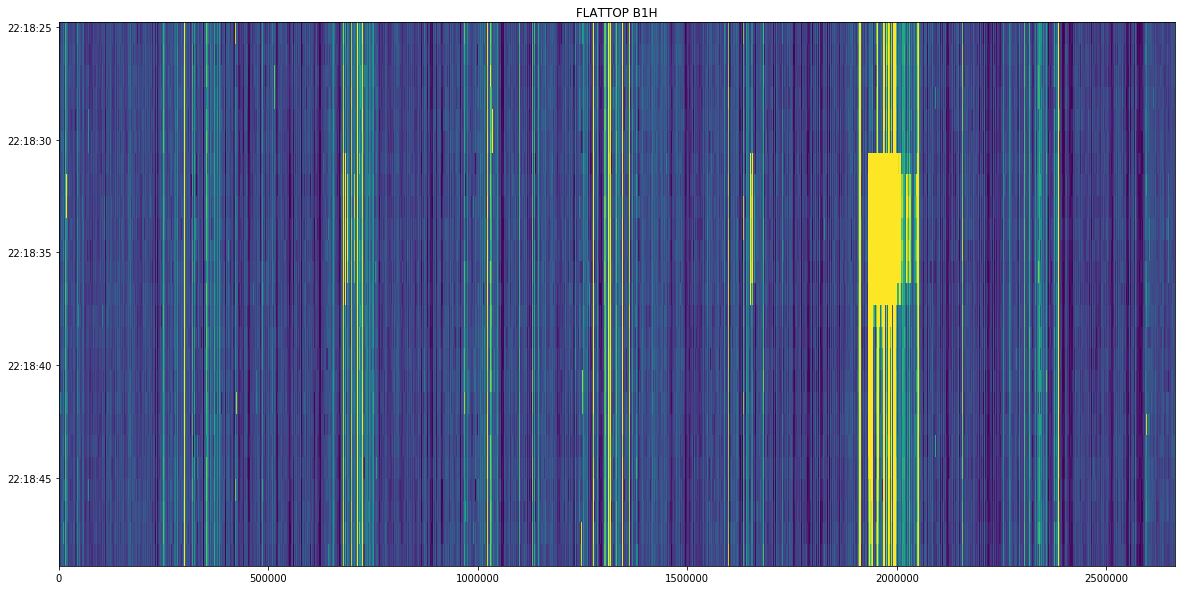

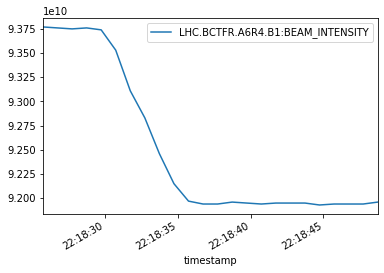

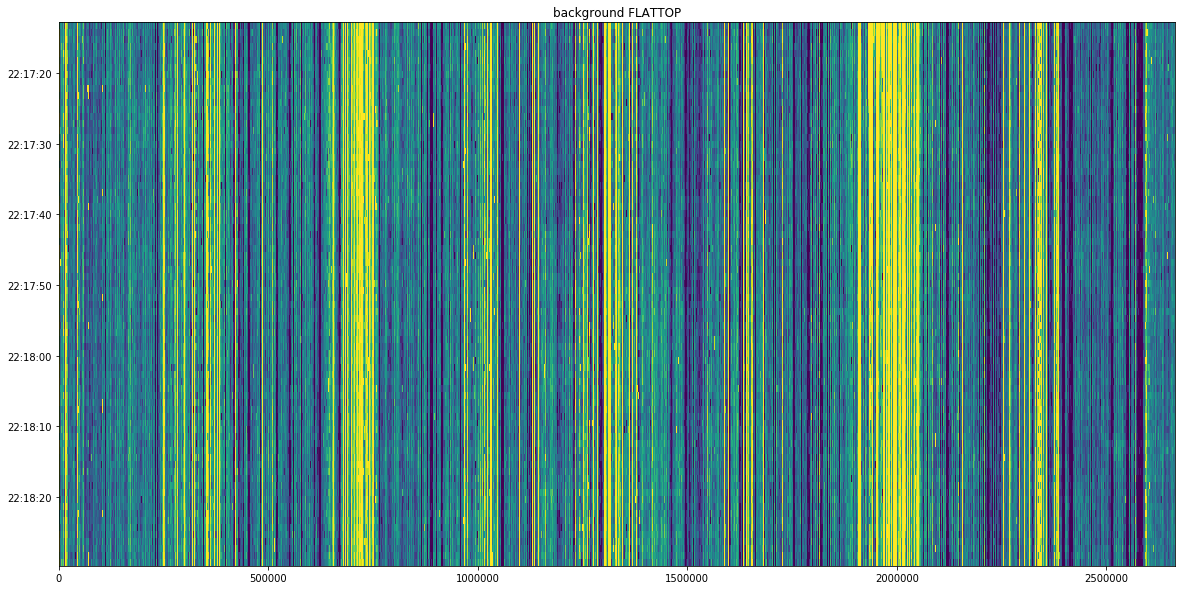

ADT_B1H_amp                                        0.1
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:18:29.759999990+02:00
Name: 2018-04-08 22:18:29.759999990+02:00, dtype: object
---------

B1H: 6 / 6
Beam mode FLATTOP
04-08 22:18:51 ▶04-08 22:19:16
Beam mode FLATTOP
04-08 22:17:11 ▶04-08 22:18:29

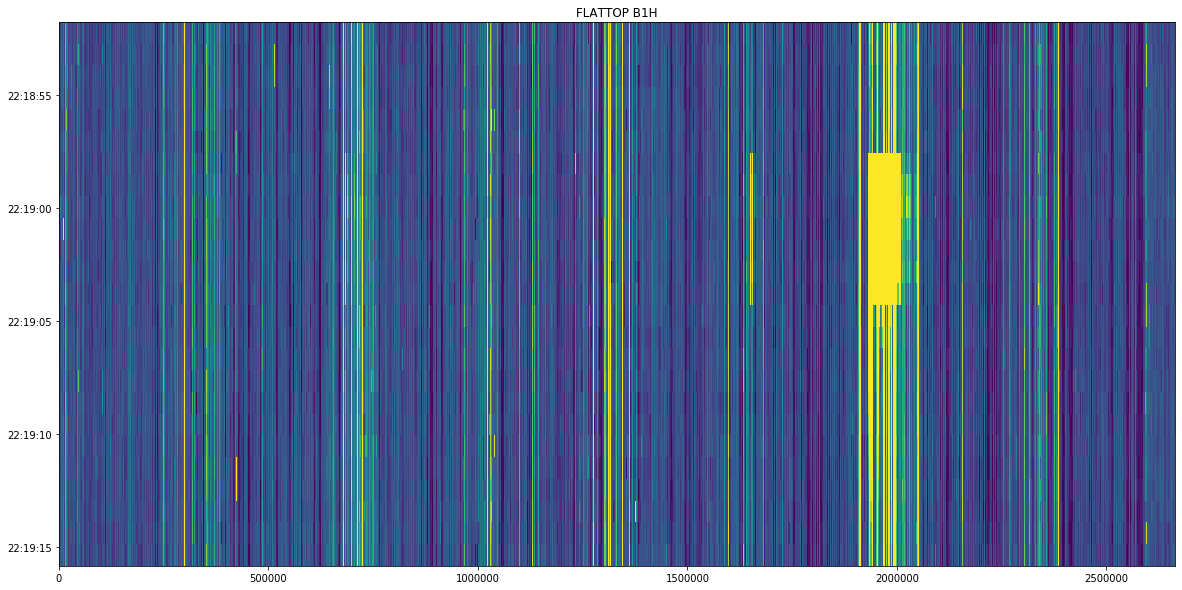

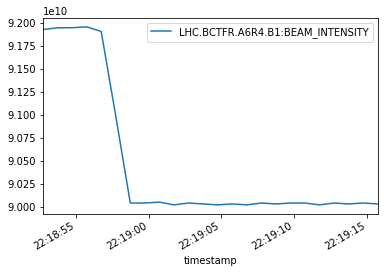

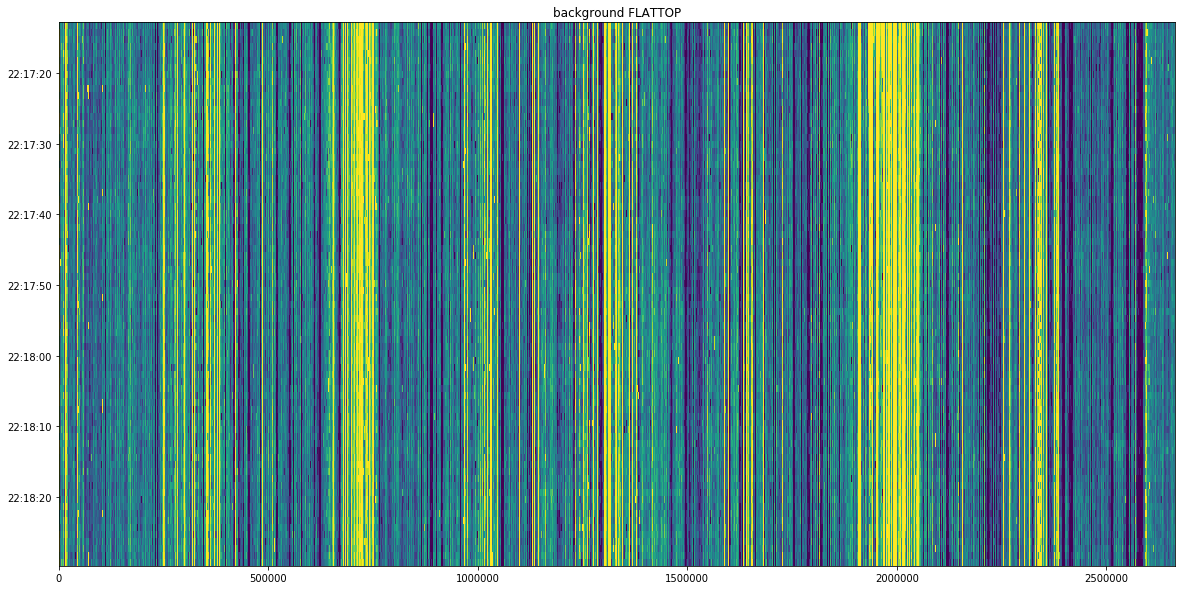

ADT_B1H_amp                                        0.1
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:18:56.762000084+02:00
Name: 2018-04-08 22:18:56.762000084+02:00, dtype: object
---------


In [5]:
for BLM_data, BLM_bg in fetcher.iter_from_ADT(t1,
                                              t2, 
                                              look_back='5S',
                                              look_forward='20S',
                                              planes=['H'],
                                              beams=[1],
                                              yield_background=True,
                                              include=['amp', 'length', 'gate']):
    
    BLM_data.plot(min_max_quantile=0.95,
                  title='{mode} B' + BLM_data.context['ADT_beam'] + BLM_data.context['ADT_plane'])
    BLM_data.fetch_intensity(beam=1).plot()
    if BLM_bg is None:
        print('Failed to fetch background.')
    else:
        BLM_bg.plot(title='background {mode}')
#     BLM_bg.get_beam_meta('intensity', beam=1).plot()
    plt.show()
    print(BLM_data.context)
    print('---------')

In [6]:
BLM_bg.df

BLMQI.01R1.B2I30_MQXA  \
mode    timestamp                                                    
FLATTOP 2018-04-08 22:17:12.773000002+02:00           2.403000e-07   
        2018-04-08 22:17:13.766999960+02:00           2.569000e-07   
        2018-04-08 22:17:14.736999989+02:00           2.430000e-07   
        2018-04-08 22:17:15.891999960+02:00           2.541000e-07   
        2018-04-08 22:17:16.756000042+02:00           2.762000e-07   
...                                                            ...   
        2018-04-08 22:18:25.920000076+02:00           2.596000e-07   
        2018-04-08 22:18:26.783999920+02:00           2.789000e-07   
        2018-04-08 22:18:27.794000149+02:00           2.486000e-07   
        2018-04-08 22:18:28.835999966+02:00           2.513000e-07   
        2018-04-08 22:18:29.749000072+02:00           2.707000e-07   

                                             BLMQI.01R1.B1E10_MQXA  \
mode    timestamp                                                    
FLATTOP 2018-04-08 22:17:12.773000002+02:00           2.900000e-07   
        2018-04-08 22:17:13.766999960+02:00           3.480000e-07   
        2018-04-08 22:17:14.736999989+02:00           3.563000e-07   
        2018-04-08 22:17:15.891999960+02:00           3.480000e-07   
        2018-04-08 22:17:16.756000042+02:00           3.728000e-07   
...                                                            ...   
        2018-04-08 22:18:25.920000076+02:00           3.480000e-07   
        2018-04-08 22:18:26.783999920+02:00           3.701000e-07   
        2018-04-08 22:18:27.794000149+02:00           3.646000e-07   
        2018-04-08 22:18:28.835999966+02:00           3.259000e-07   
        2018-04-08 22:18:29.749000072+02:00           3.425000e-07   

                                             BLMQI.01R1.B2I20_MQXA  \
mode    timestamp                                                    
FLATTOP 2018-04-08 22:17:12.773000002+02:00           2.734000e-07   
        2018-04-08 22:17:13.766999960+02:00           2.596000e-07   
        2018-04-08 22:17:14.736999989+02:00           2.817000e-07   
        2018-04-08 22:17:15.891999960+02:00           2.679000e-07   
        2018-04-08 22:17:16.756000042+02:00           2.789000e-07   
...                                                            ...   
        2018-04-08 22:18:25.920000076+02:00           2.651000e-07   
        2018-04-08 22:18:26.783999920+02:00           2.596000e-07   
        2018-04-08 22:18:27.794000149+02:00           2.596000e-07   
        2018-04-08 22:18:28.835999966+02:00           2.375000e-07   
        2018-04-08 22:18:29.749000072+02:00           2.403000e-07   

                                             BLMQI.01R1.B1E20_MQXA  \
mode    timestamp                                                    
FLATTOP 2018-04-08 22:17:12.773000002+02:00           2.817000e-07   
        2018-04-08 22:17:13.766999960+02:00           2.707000e-07   
        2018-04-08 22:17:14.736999989+02:00           2.872000e-07   
        2018-04-08 22:17:15.891999960+02:00           2.707000e-07   
        2018-04-08 22:17:16.756000042+02:00           2.817000e-07   
...                                                            ...   
        2018-04-08 22:18:25.920000076+02:00           2.348000e-07   
        2018-04-08 22:18:26.783999920+02:00           2.734000e-07   
        2018-04-08 22:18:27.794000149+02:00           2.817000e-07   
        2018-04-08 22:18:28.835999966+02:00           2.762000e-07   
        2018-04-08 22:18:29.749000072+02:00           2.651000e-07   

                                             BLMQI.02R1.B2I30_MQXB  \
mode    timestamp                                                    
FLATTOP 2018-04-08 22:17:12.773000002+02:00           2.458000e-07   
        2018-04-08 22:17:13.766999960+02:00           2.265000e-07   
        2018-04-08 22:17:14.736999989+02:00           2.320000e-07   
        2018-04-08 22:17:15.891999960+02:00        

# Getting a loss map from the data

In [7]:
BLM_data.context

ADT_B1H_amp                                        0.1
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:18:56.762000084+02:00
Name: 2018-04-08 22:18:56.762000084+02:00, dtype: object

Iterating on the max losses in the primaries of IR7 of beam 1, and creating lossmaps with the correct background signal.

/home/lcoyle/.config/miniconda3/envs/loss_maps/lib/python3.7/site-packages/pandas/core/indexes/base.py:3071: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  target = np.asarray(target)


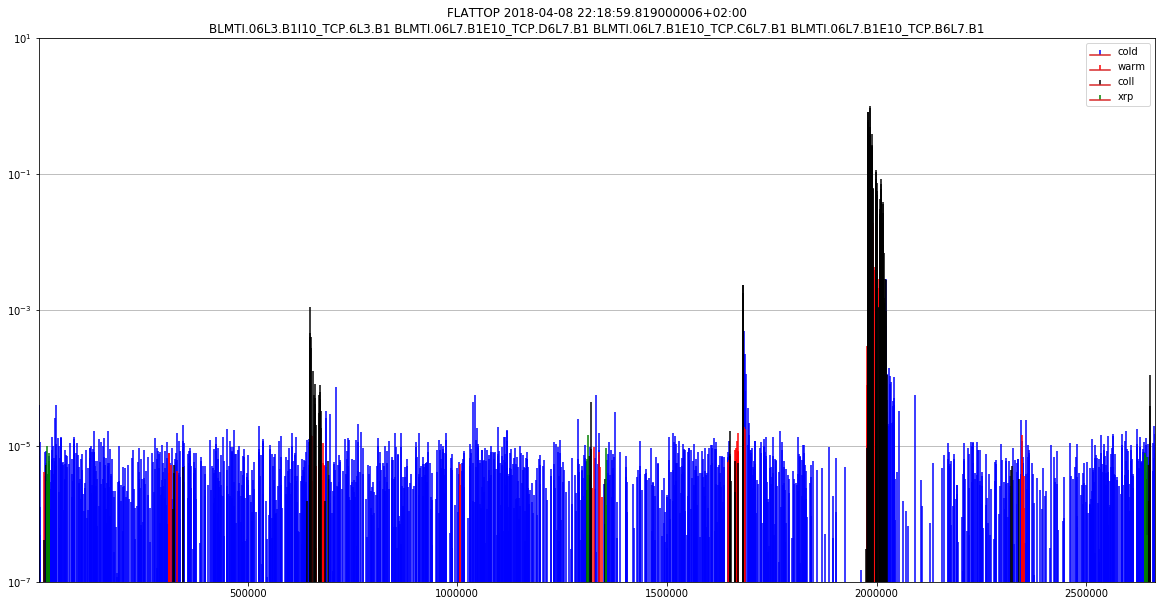

In [8]:
# Iterate on max loss occuring at beam 1 primary blms
for idx, blms in BLM_data.iter_max(BLM_max=PRIMARY_BLM_7[1]):
    LM = BLM_data.loss_map(datetime=idx[1],
                           background=BLM_bg.df.mean())
    LM.clean_background().normalize().plot(title=f'{idx[0]} {idx[1]}\n{" ".join(blms)}')

The BLM_data context carries over.

In [9]:
LM.context

ADT_B1H_amp                                        0.1
ADT_B1H_length                                     NaN
ADT_B1H_gate                                       NaN
ADT_B1H_trigger                                      1
ADT_beam                                             1
ADT_plane                                            H
ADT_datetime       2018-04-08 22:18:56.762000084+02:00
Name: 2018-04-08 22:18:56.762000084+02:00, dtype: object